Ciência de Dados para Economia e Finanças

Modelo de Previsão da Inflação medida pelo IPCA

Vítor Wilher, Cientista-Chefe

Nome : Milson da Silva Sales

In [ ]:
# Modelo de Previsão da Inflação Medida pelo IPCA


Exercício Proposto :

**Coleta** --> Foram coletado os arquivos ou Dataset no site do IBGE, BCB e também  uma parte teórica no google.

**Tratamento** --> Os arquivos serão tratados com as ferramentas do Python.

**Modelagem** --> Significado de Modelagem - substantivo feminino
Ação ou efeito de modelar; modelação.
Técnica de trabalho escolar, geralmente para crianças, que leva a fazer trabalhos de massa.
Modelagem é sinônimo de Modelação

modelação
Significado de Modelação
substantivo feminino
Ato ou arte de modelar, de fazer o modelo ou o molde de alguma coisa; modelagem.
Obra de modelador, artefato produzido por quem modela.

**Apresentação de Resultados** --> Com as ferramentas do Python nesse script.

Dicionário dos Dados

***Índice IPCA ***--> A sigla IPCA corresponde ao Índice Nacional de Preços ao Consumidor Amplo. A diferença entre eles está no uso do termo “amplo”. O IPCA engloba uma parcela maior da população. Ele aponta a variação do custo de vida médio de famílias com renda mensal de 1 e 40 salários mínimos.

FONTE :

IBGE – Instituto Brasileiro de Geografia e Estatística

Internet : Google

O que é IPCA ?

O Sistema Nacional de Índices de Preços ao Consumidor – SNIPC produz contínua e sistematicamente o Índice Nacional de Preços ao Consumidor Amplo – IPCA que tem por objetivo medir a inflação de um conjunto de produtos e serviços comercializados no varejo, referentes ao consumo pessoal das famílias. Esta faixa de renda foi criada com o objetivo de garantir uma cobertura de 90% das famílias pertencentes às áreas urbanas de cobertura do Sistema Nacional de Índices de Preços ao Consumidor - SNIPC.

Esse índice de preços tem como unidade de coleta estabelecimentos comerciais e de prestação de serviços, concessionária de serviços públicos e intenet e sua coleta estende-se, em geral, do dia 01 a 30 do mês de referência.
Atualmente, a população-objetivo do IPCA abrange as famílias com rendimentos de 1 a 40 salários mínimos, qualquer que seja a fonte, residentes nas áreas urbanas das regiões de abrangência do SNIPC, as quais são: regiões metropolitanas de Belém, Fortaleza, Recife, Salvador, Belo Horizonte, Vitória, Rio de Janeiro, São Paulo, Curitiba, Porto Alegre, além do Distrito Federal e dos municípios de Goiânia, Campo Grande, Rio Branco, São Luís e Aracaju.

Como fazer projeção do IPCA?

A estimativa para 2021 foi muito acima da margem de tolerância da meta (3,75%, com 1,50 ponto porcentual de banda), enquanto, para 2022, se aproxima do teto (5,0%). Para 2023, a meta é de 3,25%, com margem de 1,5 ponto (taxa de 1,75% a 4,75%). Já para 2024, o objetivo é de 3,0%, com tolerância de 1,5% a 4,5%.

Como prever o IPCA?

O horizonte de previsão é de 12 meses à frente. Esse é o mesmo horizonte de previsão usado na pesquisa Focus para prever a série IPCA acumulada em 12 meses. Além de possibilitar a comparação com a Focus, essa escolha do horizonte de previsão também é útil para o BC, dado o efeito defasado da política monetária. 

Fonte : https://www.youtube.com/watch?v=7rFsu48oBn8

www.bcb.gov.br

https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries

http://api.bcb.gov.br/dados/serie/bcdata.sgs.20542/dados?formato=json

In [1]:
# Importação das Bibliotecas 
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
import matplotlib
matplotlib.rcParams['figure.figsize'] = (16,8)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!pip install python-bcb


In [3]:
from bcb import sgs

In [4]:
def consulta_bc(codigo_bcb):
  url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
  df = pd.read_json(url)
  df['data'] = pd.to_datetime(df['data'], dayfirst=True)
  df.set_index('data', inplace=True)
  return df

In [5]:
ipca = consulta_bc(433)

In [27]:
ipca

,data
Date,
2000-05-31,0.1373
2000-06-01,0.1406
2000-06-02,0.1340
2000-06-05,0.1253
2000-06-06,0.1307
...,...
2012-12-24,0.0756
2012-12-26,0.0643
2012-12-27,0.0660


In [7]:
ipca.shape

(506, 1)

In [8]:
ipca.isnull().sum()

valor    0
dtype: int64

In [9]:
ipca.dtypes

valor    float64
dtype: object

In [ ]:
ipca.info()

In [11]:
ipca.columns

Index(['valor'], dtype='object')

In [ ]:
# Fonte https://www.bcb.gov.br/controleinflacao/historicotaxasjuros

In [ ]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()

In [13]:
import pandas_datareader.data as web

In [ ]:
ipca

In [ ]:
ipca = web.get_data_yahoo(['valor', 'data'],
                                start = '2000-05-31',
                                  end = '2012-12-31')
 
#ipca = ipca.dropna()
 
sns.set()
 
ipca.plot(subplots = True, figsize = (20, 6))

In [ ]:
! pip install sidrapy

In [31]:
import time
import sidrapy 

In [ ]:
plt.plot(ipca)
plt.style.use('default')

In [ ]:
sns.set_theme()
sns.lineplot(data = ipca)

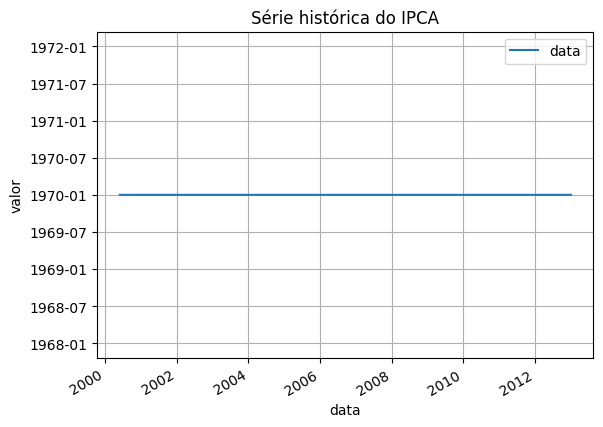

In [40]:
ipca.plot(grid=True, marker=",")
plt.xlabel('data')
plt.ylabel('valor')
plt.title(u'Série histórica do IPCA')
plt.show()

In [44]:
# Variação Mensal por Cidade em Fevereiro de 2022
IPCA_Cidade = pd.read_csv('/content/Variação Mensal por Cidade Fev-2022.csv', delimiter=';')


In [ ]:
IPCA_Cidade

In [46]:
IPCA_Cidade.shape

(3, 1)

In [ ]:
IPCA_Cidade.info()

In [ ]:
IPCA_Cidade.dtypes

In [ ]:
y=['Aracaju (SE)', 'Belo Horizonte (MG)', 'Belém (PA)', 'Brasília (DF)', 'Campo Grande (MS)', 'Curitiba (PR)', 'Fortaleza (CE)', 'Goiânia (GO)', 'Grande Vitória (ES)', 'Porto Alegre (RS)', 'Recife (PE)', 'Rio Branco (AC)', 'Rio de Janeiro (RJ)', 'Salvador (BA)', 'São Luís (MA)', 'São Paulo (SP)'] 
x=[1.26,1.07,0.97,0.93,1.06,1.28,0.77,0.91,0.86,0.43,0.97,0.93,1.32,0.83,1.33,1.05]  
plt.barh(y, x) 
plt.ylabel("CIDADES") 
plt.xlabel("VARIAÇÃO MENSAL POR CIDADE (%)")  
plt.title("Gráfico de Barra Horizontal") 
plt.show() 

In [52]:
# Variação mensal por Grupo em Fevereiro de 2022
IPCA_Grupo = pd.read_csv('/content/Variação Mensal por Grupo Fev-2022.csv', delimiter=';')

In [53]:
IPCA_Grupo

,,,,,,,,,,Variação mensal por grupos
,1.Alimentação e bebidas,2.Habitação,3.Artigos de residência,4.Vestuário,5.Transportes,6.Saúde e cuidados pessoais,7.Despesas pessoais,8.Educação,9.Comunicação,Índice geral
Brasil,1.28,0.54,1.76,0.88,0.46,0.47,0.64,5.61,0.29,1.01
"Fonte: ""IBGE - Índice Nacional de Preços ao Consumidor Amplo""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
IPCA_Grupo.shape


(3, 1)

In [56]:
IPCA_Grupo.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3 entries, (' ', '1.Alimentação e bebidas', '2.Habitação', '3.Artigos de residência', '4.Vestuário', '5.Transportes', '6.Saúde e cuidados pessoais', '7.Despesas pessoais', '8.Educação', '9.Comunicação') to ('Fonte: "IBGE - Índice Nacional de Preços ao Consumidor Amplo"', nan, nan, nan, nan, nan, nan, nan, nan, nan)
Data columns (total 1 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Variação mensal por grupos  2 non-null      object
dtypes: object(1)
memory usage: 1.4+ KB


In [57]:
IPCA_Grupo.dtypes

Variação mensal por grupos    object
dtype: object

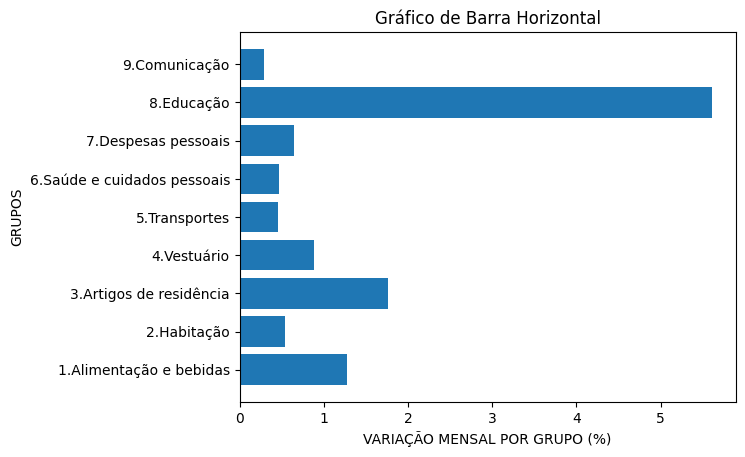

In [54]:
y=['1.Alimentação e bebidas', '2.Habitação', '3.Artigos de residência', '4.Vestuário', '5.Transportes', '6.Saúde e cuidados pessoais', '7.Despesas pessoais', '8.Educação', '9.Comunicação'] 
x=[1.28,0.54,1.76,0.88,0.46,0.47,0.64,5.61,0.29]  
plt.barh(y, x) 
plt.ylabel("GRUPOS") 
plt.xlabel("VARIAÇÃO MENSAL POR GRUPO (%)")  
plt.title("Gráfico de Barra Horizontal") 
plt.show() 

Referências Bibliográficas :    

Pandas Documentação --> https://pandas.pydata.org/docs/

Numpy Documentação --> https://numpy.org/doc/

Seaborn Documentação --> http://seaborn.pydata.org/introduction.html 

Matplotlib Documentação --> Matplolib Homepage <https://matplotlib.org>


scikit learn Documentação --> https://scikit-learn.org/

IBGE - Instituto Brasileiro de Geografia e Estatística --> https://www.ibge.gov.br/

Google --> https://www.google.com.br/

BCB - Banco Central do Brasil --> https://www.bcb.gov.br/

Site Consultados :

Fonte : https://www.youtube.com/watch?v=7rFsu48oBn8

www.bcb.gov.br

https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries

http://api.bcb.gov.br/dados/serie/bcdata.sgs.20542/dados?formato=

Fonte : https://www.youtube.com/watch?v=7rFsu48oBn8

www.bcb.gov.br

https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries

http://api.bcb.gov.br/dados/serie/bcdata.sgs.20542/dados?formato=json

https://analisemacro.com.br/